# Python setup

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
from buildingspy.io.outputfile import Reader

In [4]:
from ipypublish import nb_setup

## Cosmetics


In [5]:
pd = nb_setup.setup_pandas()
pd.set_option('precision', 3)

In [6]:
# https://stackoverflow.com/a/39566040/11552622
rcparams = {
    'axes.titlesize':13,
    'axes.labelsize':9,
    'xtick.labelsize':8,
    'ytick.labelsize':8
}

In [7]:
# IPyPublish customization of matplotlib.pyplot and pandas
from ipypublish import nb_setup
plt = nb_setup.setup_matplotlib(output=('pdf','svg'), rcparams=rcparams, usetex=True)

## Path configuration

In [49]:
file_names = {
    # Results summary table
    'table': 'table.csv', 
    # Hemodynamic parameters
    'Xexact': 'Xexact.csv', 'Xpred':'Xpredicted.csv',
    # DNN responses
    'Ytest':'Ytest.txt', 'Ypred':'Ytestpred.txt',
    # Simulation files
    'simulation': 'Ursino1998Model_VAD2_{}_{}.mat'
}

In [50]:
prefix = '/media/maousi/Data/tmp/'
suffix = '/results/'
results_folders = {
    # Boolean: artificial pulse
    False: {
        # Integer: RPM
        4000: 'simulations_2020_03_21',
        5000: 'simulation_LVAD_RPM5000_2020_04_21',
        6000: 'simulation_LVAD_RPM6000_2020_04_22',
        # Convention: put the simulations without LVAD here, i.e. RPM=0
        0:    'simulation_noLVAD_2020_04_15'
    },
    True: {
        # Integer: RPM
        4000: 'simulation_LVAD_RPM4000_Pulse_T30_N2000_2020_04_26',
        5000: 'simulation_LVAD_RPM5000_Pulse_T30_N2000_2020_04_26',
        6000: 'simulation_LVAD_RPM6000_Pulse_T30_N2000_2020_04_26'
        #4000: 'simulation_LVAD_RPM4000_Pulse_T20_N500_2020_05_31',
        #5000: 'simulation_LVAD_RPM5000_Pulse_T20_N500_2020_05_31',
        #6000: 'simulation_LVAD_RPM6000_Pulse_T20_N500_2020_05_31'
    }
}
for ap, dic in results_folders.items():
    for rpm, path in dic.items():
        dic[rpm] = prefix+path+suffix

---

# Latex generator

## Parameter range

In [7]:
cols = [r'$E_{max,lv}$', r'$E_{max,lv,0}$',
                  r'$G_{E_{max,lv}}$', r'$k_{E,lv}$']
index = ['Lower bound', 'Upper bound']
data = np.array([
    [0.2, 2.95],
    [0.2, 2.392],
    [0.2, 0.475],
    [0.011, 0.014]
]).transpose()

In [8]:
pd.DataFrame(data=data, index=index, columns=cols)

,"$E_{max,lv}$","$E_{max,lv,0}$","$G_{E_{max,lv}}$","$k_{E,lv}$"
Lower bound,0.20,0.200,0.200,0.011
Upper bound,2.95,2.392,0.475,0.014


## DNN results

In [109]:
# Define utility function to format results table
def format_table(table):
    table.index = [
        'Min exact', 'Max exact', 'Mean exact', 'SD exact', 'Min pred', 
        'Max pred', 'Mean pred', 'SD pred', 'Avg err mx', 
        'Avg rel err%', 'SD error', 'CI min', 'CI max',
    ]
    table.columns = [
        'HR','SAPM','SAPS','SAPD', 'PAPM','PAPS','PAPD','LVEF',
        'LVEDV', 'LVESV', 'CI', 'PCPW'
    ]
    # Multiply relative error by 100
    table.loc['Avg rel err%', :] = table.loc['Avg rel err%', :] * 100

In [93]:
# Load the table, format it and return it
def get_results_table(artificial_pulse, RPM):
    """
    :param artificial_pulse: bool
    :param RPM: int
    """
    df = pd.read_csv(
        results_folders[artificial_pulse][RPM] + file_names['table'], 
        header=None
    )
    format_table(df)
    return df

In [110]:
get_results_table(artificial_pulse=True, RPM=4000)

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
Min exact,62.500,75.432,89.977,68.160,15.301,26.609,9.646,29.833,126.304,34.254,0.421,4.998
Max exact,78.431,101.865,133.694,86.240,23.131,31.407,18.993,74.625,209.397,146.796,1.892,15.687
Mean exact,67.075,92.573,119.839,78.940,17.766,28.191,12.554,56.378,153.906,68.760,-1.513,8.420
SD exact,3.459,6.012,9.717,4.253,1.588,1.005,1.886,10.147,17.231,23.601,0.313,2.185
Min pred,62.500,75.669,90.091,68.458,15.199,26.596,9.499,28.961,128.436,34.356,0.457,4.851
Max pred,78.431,102.156,133.942,86.262,23.075,31.401,18.911,74.607,211.723,148.634,1.900,15.415
Mean pred,67.134,92.476,119.587,78.921,17.760,28.189,12.546,56.474,154.791,69.161,-1.504,8.434
SD pred,3.650,6.307,10.239,4.426,1.647,1.037,1.958,10.678,18.068,24.819,0.329,2.272
Avg err mx,0.546,0.612,1.023,0.486,0.144,0.096,0.171,1.606,2.186,3.188,0.032,0.193
Avg rel err%,0.805,0.681,0.894,0.627,0.787,0.336,1.308,2.950,1.362,4.782,2.609,2.211


In [112]:
def format_table_article(art_pulse, RPM):
    # TODO : check multicolumn param of to_latex !!!! and many other params
    df = get_results_table(artificial_pulse=art_pulse, RPM=RPM)
    return df.to_latex(caption=f'{art_pulse}, {RPM}', bold_rows=True, 
                       float_format='%.2f', escape=True)

In [113]:
format_table_article(True,4000)

'\\begin{table}\n\\centering\n\\caption{True, 4000}\n\\begin{tabular}{lrrrrrrrrrrrr}\n\\toprule\n{} &    HR &   SAPM &   SAPS &  SAPD &  PAPM &  PAPS &  PAPD &  LVEF &  LVEDV &  LVESV &    CI &  PCPW \\\\\n\\midrule\n\\textbf{Min exact   } & 62.50 &  75.43 &  89.98 & 68.16 & 15.30 & 26.61 &  9.65 & 29.83 & 126.30 &  34.25 &  0.42 &  5.00 \\\\\n\\textbf{Max exact   } & 78.43 & 101.87 & 133.69 & 86.24 & 23.13 & 31.41 & 18.99 & 74.63 & 209.40 & 146.80 &  1.89 & 15.69 \\\\\n\\textbf{Mean exact  } & 67.08 &  92.57 & 119.84 & 78.94 & 17.77 & 28.19 & 12.55 & 56.38 & 153.91 &  68.76 & -1.51 &  8.42 \\\\\n\\textbf{SD exact    } &  3.46 &   6.01 &   9.72 &  4.25 &  1.59 &  1.00 &  1.89 & 10.15 &  17.23 &  23.60 &  0.31 &  2.19 \\\\\n\\textbf{Min pred    } & 62.50 &  75.67 &  90.09 & 68.46 & 15.20 & 26.60 &  9.50 & 28.96 & 128.44 &  34.36 &  0.46 &  4.85 \\\\\n\\textbf{Max pred    } & 78.43 & 102.16 & 133.94 & 86.26 & 23.07 & 31.40 & 18.91 & 74.61 & 211.72 & 148.63 &  1.90 & 15.41 \\\\\n\\textbf{

In [102]:
from datetime import datetime

In [114]:
configs = [(True, 4000), (True, 5000), (True, 6000), (False, 4000),
           (False, 5000), (False, 6000)]

data = '\n'.join([format_table_article(*config) for config in configs])

In [115]:
header = '%\n% AUTOMATICALLY GENERATED - ' + datetime.now().strftime('%d-%m-%Y %H:%M:%S')
header += '\n% Notebook : N13 Article Utility\n%\n\n'
with open('data/dnn_hemodynamic_tables.tex', 'w') as f:
    f.write(header + data)

# Get a visual

## Normalization

In [46]:
#import sys
#import scipy.io as sio

#sys.path.insert(0, '../Simulation_script/')

#%run ../Deep_learning/utils_deeplearning.py

#X = sio.loadmat('/media/maousi/Data/tmp/dnntest/X.mat')['X']

#X.shape

#plt.hist(X[0, 0])

#ncoeff, nfreq = X.shape[1], X.shape[2]

#newmins = np.full([ncoeff, nfreq], 0.0)
#newmaxs = np.full([ncoeff, nfreq], 1.0)

#%%capture cap_out
#Xnorm, _, _ = normalizeinputmatDL(X, newmins, newmaxs);

#plt.hist(Xnorm[0, 0])

# Figures



## SHF simulations

In [19]:
sns.set(style='whitegrid')

In [20]:
# Define: variables to load
variables = ['SystemicArteries.PC', 'AorticValve.Inlet.Q',
             'SystemicArteries.Inlet.Q', 'LVAD.RPM', 'LeftVentricle.Inlet.P']
# Define folder
folder_standalone_sim = '/media/maousi/Data/tmp/standalone_simulations/'

In [21]:
# Data structure: nested dictionnaries
# level 1 = heart failure, level 2 = rpm
data_sim = {
    hf_level: {rpm: None for rpm in [4000, 5000, 6000]}
    for hf_level in ['MHF', 'SHF']
}

In [22]:
def time_range(tmin, tmax, t, signal):
    ids = np.where(np.logical_and(t >= tmin, t <= tmax))
    return t[ids], signal[ids]

def read_simulations(path, file_format, data, variables, tmin, tmax):
    for hf_level, subdata in data.items():
        for rpm in subdata:
            file = path + file_format.format(hf_level, rpm)
            reader = Reader(file, 'dymola')
            subdata[rpm] = [
                time_range(tmin, tmax, *reader.values(v)) for v in variables
            ]

In [23]:
read_simulations(
    path=folder_standalone_sim, file_format='Ursino1998Model_VAD2_{}_{}.mat',
    data=data_sim, variables=variables, tmin=20.0, tmax=30.0
)

In [24]:
data_sim['SHF'][4000]

[(array([20.        , 20.        , 20.00424609, ..., 30.        ,
         30.        , 30.        ]),
  array([74.08635286, 74.08635286, 76.62318061, ..., 72.66994084,
         72.66994084, 72.66994084])),
 (array([20.        , 20.        , 20.00424609, ..., 30.        ,
         30.        , 30.        ]),
  array([0., 0., 0., ..., 0., 0., 0.])),
 (array([20.        , 20.        , 20.00424609, ..., 30.        ,
         30.        , 30.        ]),
  array([  0.        , 178.95      , 178.95      , ...,   6.67708677,
         178.95      , 178.95      ])),
 (array([20.        , 20.        , 20.00424609, ..., 30.        ,
         30.        , 30.        ]),
  array([4000., 2000., 2000., ..., 4000., 2000., 2000.])),
 (array([20.        , 20.        , 20.00424609, ..., 30.        ,
         30.        , 30.        ]),
  array([12.77283544, 12.77283544, 12.8931806 , ..., 16.24197913,
         16.24197913, 16.24197913]))]

In [25]:
# We have 2 heart failure levels * 3 rpm levels = 6 simulations
# The function handles data for a given heart failure level
def plot_simulations(data_hf):
    fig, ax = plt.subplots(len(data_hf), 1, figsize=(10, 10))

    for i, (rpm_c, data) in enumerate(data_hf.items()):
        ax1 = ax[i]
        ax2 = ax1.twinx()

        (t1, pressure), (t2, valve_flow), (t3, aortic_flow), (t4, rpm), (t5, lv_pressure) = data
        #(t1, pressure), (t2, valve_flow), (t3, arotic_flow), (t4, rpm) = data[0], data[1], data[2], data[3]
        ax1.plot(t4, rpm/100, 'k--', linewidth=1)
        ax1.plot(t1, pressure, 'b')
        ax1.plot(t1, lv_pressure, '--', linewidth=0.5)
        ax2.plot(t2, valve_flow, 'g--', linewidth=1)
        ax2.plot(t3, aortic_flow, 'r')
        #ax2.set_ylim([min(flow)-25, max(flow)+25])
        #ax1.set_ylim(-5, max(max(pressure), max(flow)))
        #ax2.plot(t2, flow)

        # Manage x axis
        if i == 2:
            ax1.set_xlabel('Time [s]')
        else:
            pass#ax1.set_xticks([])
        
        ax1.set_ylabel('Systemic pressure [mmHg]\nLV pressure [mmHg]\nPump speed [RPM/100]')
        ax2.set_ylabel('Aortic flow [ml/s]\nValve flow [ml/s]')
        #ax1.yaxis.label.set_color('b')
        # Align the grids
        #ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
        ax2.grid(False)
        ax2.set_ylim([-5, 1.5*max(aortic_flow)])
        #ax1.set_title('RPM mean = {}'.format(rpm_c))

    plt.subplots_adjust(hspace=.2)

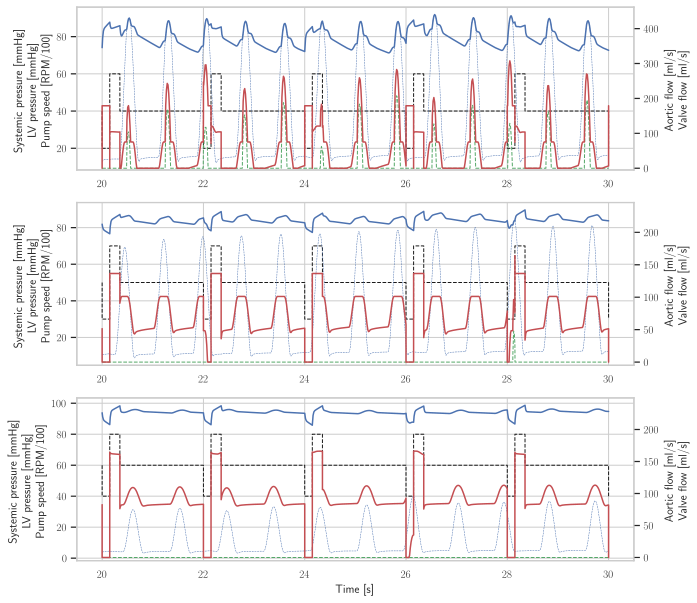

In [26]:
plot_simulations(data_sim['SHF'])
plt.savefig('figs/SHF_simulations.eps')

In [27]:
def plot_simulations2(data_hf):
    fig, ax = plt.subplots(len(data_hf), 1, figsize=(10, 10))

    for i, (rpm_c, data) in enumerate(data_hf.items()):
        ax1 = ax[i]
        ax2 = ax1.twinx()

        (t1, pressure), (t2, valve_flow), (t3, aortic_flow), (t4, rpm), (t5, lv_pressure) = data
        #(t1, pressure), (t2, valve_flow), (t3, arotic_flow), (t4, rpm) = data[0], data[1], data[2], data[3]
        l1, = ax1.plot(t4, rpm/100, 'k--', linewidth=1)
        l2, = ax1.plot(t1, pressure, 'b')
        l3, = ax1.plot(t1, lv_pressure, '--', linewidth=0.5)
        l4, = ax2.plot(t2, valve_flow, 'g--', linewidth=1)
        l5, = ax2.plot(t3, aortic_flow, 'r')
        #ax2.set_ylim([min(flow)-25, max(flow)+25])
        #ax1.set_ylim(-5, max(max(pressure), max(flow)))
        #ax2.plot(t2, flow)

        # Manage x axis
        if i == 2:
            ax1.set_xlabel('Time [s]')
        else:
            pass#ax1.set_xticks([])
        
        ax1.set_ylabel('Systemic pressure [mmHg]\nLV pressure [mmHg]\nPump speed [RPM/100]')
        ax2.set_ylabel('Aortic flow [ml/s]\nValve flow [ml/s]')
        #ax1.yaxis.label.set_color('b')
        # Align the grids
        #ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
        ax2.grid(False)
        ax2.set_ylim([-5, 1.5*max(aortic_flow)])
        #ax1.set_title('RPM mean = {}'.format(rpm_c))

    plt.subplots_adjust(hspace=.2)
    ax2.legend(handles = [l1,l2,l3, l4, l5], labels=['LVAD speed', 'SAP', 'LV pressure', 'Aortic valve flow', 'Aortic flow'], 
               bbox_to_anchor=(0.5, -0.35), fancybox=False, shadow=False, ncol=5, loc='center')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


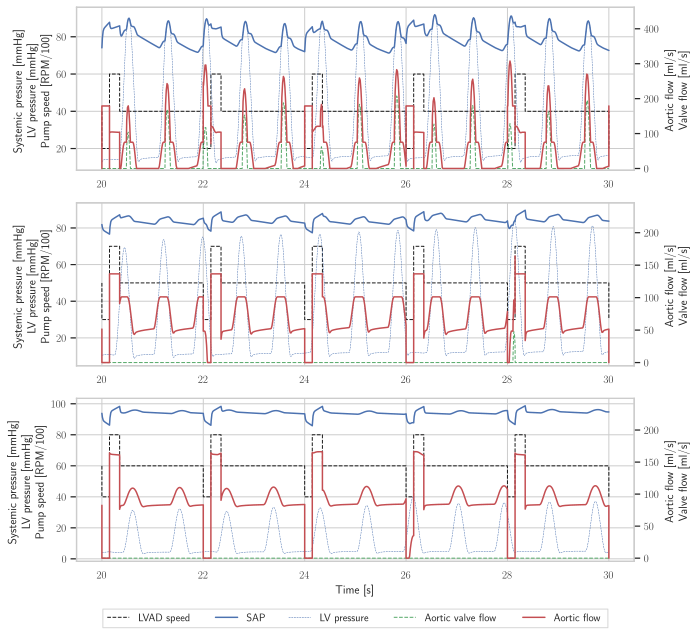

In [28]:
plot_simulations2(data_sim['SHF'])
plt.savefig('figs/SHF_simulations_enhanced.eps')

### Compare pressure 


### Compute metrics

In [29]:
shf = data_sim['SHF']

In [30]:
# get_sap returns (t, pressure)
get_sap = lambda datastruct, rpm: datastruct[rpm][0]

In [31]:
# Mean SAP


## DNN accuarcy

### Effect of artificial pulse

In [32]:
Ymse = pickle.load(open('data/dnn_mse.bin', 'rb'))

In [33]:
Ymse

Parameter                  Emax     Emax0    G_Emax           k_E
RPM  Artificial Pulse                                            
0    False             0.008973  0.007464  0.001996  2.603902e-08
4000 False             0.011211  0.006052  0.001854  1.250480e-08
     True              0.017046  0.009693  0.003327  4.001988e-08
5000 False             0.014051  0.007078  0.002771  2.662316e-08
     True              0.030419  0.009601  0.004705  3.635133e-08
6000 False             0.008550  0.003071  0.000826  2.915873e-08
     True              0.021628  0.005809  0.002848  1.269316e-08

In [34]:
Ymse.index

MultiIndex([(   0, False),
            (4000, False),
            (4000,  True),
            (5000, False),
            (5000,  True),
            (6000, False),
            (6000,  True)],
           names=['RPM', 'Artificial Pulse'])

In [35]:
YmseT = Ymse.transpose()
YmseT

RPM                       0             4000                        5000  \
Artificial Pulse         False         False         True          False   
Parameter                                                                  
Emax              8.972837e-03  1.121134e-02  1.704627e-02  1.405068e-02   
Emax0             7.464042e-03  6.052479e-03  9.693118e-03  7.077843e-03   
G_Emax            1.995823e-03  1.854373e-03  3.327422e-03  2.771385e-03   
k_E               2.603902e-08  1.250480e-08  4.001988e-08  2.662316e-08   

RPM                                     6000                
Artificial Pulse         True          False         True   
Parameter                                                   
Emax              3.041869e-02  8.550243e-03  2.162788e-02  
Emax0             9.601331e-03  3.071437e-03  5.809173e-03  
G_Emax            4.704592e-03  8.264770e-04  2.848404e-03  
k_E               3.635133e-08  2.915873e-08  1.269316e-08

In [36]:
rpms = [4000, 5000, 6000]
columns = pd.Index(name='RPM', data=rpms)
artpulse_error = pd.DataFrame(columns=columns, index=YmseT.index)
for rpm in rpms:
    # Compute MSE relative increase of each param for each rpm
    percincrease = (YmseT[(rpm, True)] - YmseT[(rpm, False)])/YmseT[(rpm, False)] * 100
    artpulse_error.loc[:, rpm] = percincrease

In [37]:
artpulse_error

RPM,4000,5000,6000
Parameter,,,
Emax,52.044850,116.492696,152.950435
Emax0,60.151211,35.653351,89.135333
G_Emax,79.436473,69.755971,244.644111
k_E,220.036284,36.540294,-56.468754


In [38]:
artpulse_error.apply(np.mean, axis=1)

Parameter
Emax      107.162660
Emax0      61.646632
G_Emax    131.278852
k_E        66.702608
dtype: float64

### Effect of LVAD presence

In [39]:
Ymse.drop((0, False)).apply(np.mean)

Parameter
Emax      1.715085e-02
Emax0     6.884230e-03
G_Emax    2.722109e-03
k_E       2.622518e-08
dtype: float64

## HEmodynamic quantities

In [40]:
X = pd.read_csv('data/hemodynamic_test_data.csv')

In [41]:
X

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,...,PAPM_hat,PAPS_hat,PAPD_hat,LVEF_hat,LVEDV_hat,LVESV_hat,CI_hat,PCPW_hat,RPM,art_pulse
0,65.217391,90.853600,122.580232,74.990285,18.246077,29.196520,12.770856,58.166914,142.949517,59.800194,...,18.117516,28.990198,12.681175,58.834069,141.975938,58.445716,2.063254,8.682431,4000,False
1,62.500000,94.702502,126.595962,78.755773,16.719180,27.999919,11.078811,57.531861,158.079150,67.133273,...,16.661273,28.008215,10.987803,58.473456,156.194928,64.862356,2.123285,6.812085,4000,False
2,65.217391,92.609776,126.435978,75.696675,18.193093,29.000448,12.789416,54.782405,149.250685,67.487571,...,18.172884,28.960065,12.779293,54.440236,150.272467,68.463782,2.193700,8.471282,4000,False
3,62.500000,93.788953,126.441664,77.462598,17.356856,28.540265,11.765151,58.570209,148.720360,61.614534,...,17.189097,28.380363,11.593464,58.966211,149.551618,61.366695,2.050003,7.449523,4000,False
4,62.500000,94.978545,128.960053,77.987791,17.525749,28.486615,12.045316,53.208741,162.688402,76.123951,...,17.490663,28.581349,11.945319,54.271334,161.837829,74.006280,2.237018,7.393110,4000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,69.490717,93.456844,108.760781,85.804876,13.948959,25.755606,8.045635,60.591265,100.597833,39.644334,...,13.958954,25.767123,8.054870,60.622614,99.711079,39.263616,0.221142,3.250894,6000,True
3496,68.965517,91.272495,103.406873,85.205306,14.345969,25.926282,8.555812,58.167093,97.376392,40.735375,...,14.261671,25.926189,8.429411,57.014631,94.254255,40.515539,0.139074,3.644838,6000,True
3497,70.001125,95.298143,112.014718,86.939856,13.786635,25.695602,7.832152,68.128147,98.478002,31.386764,...,13.755529,25.686276,7.790156,69.027104,97.800567,30.291668,0.331819,2.993157,6000,True
3498,63.492063,89.436247,99.403701,84.452520,14.889113,26.152609,9.257364,57.425292,109.132181,46.462708,...,14.905022,26.168880,9.273093,57.521247,108.970502,46.289310,0.000000,4.434769,6000,True


In [42]:
X.columns

Index(['HR', 'SAPM', 'SAPS', 'SAPD', 'PAPM', 'PAPS', 'PAPD', 'LVEF', 'LVEDV',
       'LVESV', 'CI', 'PCPW', 'HR_hat', 'SAPM_hat', 'SAPS_hat', 'SAPD_hat',
       'PAPM_hat', 'PAPS_hat', 'PAPD_hat', 'LVEF_hat', 'LVEDV_hat',
       'LVESV_hat', 'CI_hat', 'PCPW_hat', 'RPM', 'art_pulse'],
      dtype='object')

In [43]:
# Relative errors
E = X.loc[:, ['RPM', 'art_pulse'] + [col for col in X.columns if '_relerr' in col]]

In [44]:
E

,RPM,art_pulse
0,4000,False
1,4000,False
2,4000,False
3,4000,False
4,4000,False
...,...,...
3495,6000,True
3496,6000,True
3497,6000,True
3498,6000,True


### Mean relative errors

In [45]:
E = E.groupby(['RPM', 'art_pulse']).mean().rename({
    col: col.split('_')[0] for col in E.columns[2:]
}, axis=1)

DataError: No numeric types to aggregate

In [ ]:
E.index.rename(['RPM', 'Art. Pulse'], inplace=True)

In [ ]:
pd.set_option('precision', 2)

In [ ]:
E

### Mean

In [ ]:
Xmean = X.loc[:, [c for c in X.columns if '_relerr' in c]].mean()
Xmean

### Median

In [ ]:
Xmed = X.loc[:, [c for c in X.columns if '_relerr' in c]].median()
Xmed

In [ ]:
pd.DataFrame([Xmean, Xmed]).transpose().rename({0:'Mean', 1:'Median'}, axis=1)

### Describe

In [ ]:
X.loc[:, [c for c in X.columns if '_relerr' in c]].describe().transpose()

### Effect of artificial pulse

In [ ]:
AP_data_ = E.drop('CI', axis=1).drop((0, False))
AP_data_

In [ ]:
AP_data = pd.DataFrame(index=AP_data_.columns)
for rpm in [4000,5000,6000]:
    diff = AP_data_.loc[(rpm, True), :] - AP_data_.loc[(rpm, False), :]
    AP_data[rpm] = diff / AP_data_.loc[(rpm, True), :] * 100

In [ ]:
AP_data

In [ ]:
AP_data.mean()

### Effet of RPMs when artificial pulse is active

In [ ]:
RPM = X.loc[X.art_pulse == True, ['RPM'] + [c for c in X.columns if '_relerr' in c]].groupby('RPM').mean()
RPM

### Effect of RPM when artificial pulse is NOT active

In [ ]:
RPM = X.loc[X.art_pulse == False, ['RPM'] + [c for c in X.columns if '_relerr' in c]].groupby('RPM').mean()
RPM